In [1]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df_X = data.data
df_y = data.target

In [2]:
import numpy as np

X = np.array(df_X)

print(type(X), X.dtype)

<class 'numpy.ndarray'> float64


In [3]:
y = np.array(df_y)

print(type(y), y.dtype)

<class 'numpy.ndarray'> float64


In [4]:
# train 데이터와 test 데이터로 분리하기

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
) #Test_size =0.3으로 변경

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(309, 10) (309,)
(133, 10) (133,)


In [5]:
# 모델 준비하기

W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print(len(W))

10


In [6]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [7]:
# 손실함수 loss 정의하기 

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [8]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [9]:
#기울기를 구하는 gradient 함수 구현하기 

def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [10]:
#기울기를 구하는 gradient 함수 구현하기

def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [11]:
LEARNING_RATE = 0.4 #0.4로 변경

In [12]:
## 모델 학습하기
# %%timeit -n 1 -r 1
global W, b

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 4279.7375
Iteration 200 : Loss 3657.5859
Iteration 300 : Loss 3385.7242
Iteration 400 : Loss 3237.7930
Iteration 500 : Loss 3146.5043
Iteration 600 : Loss 3086.7459
Iteration 700 : Loss 3046.5238
Iteration 800 : Loss 3019.0197
Iteration 900 : Loss 2999.9925
Iteration 1000 : Loss 2986.6930


In [13]:
# 테스트 데이터에 대한 성능 확인하기

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse


np.float64(2808.2297033279315)

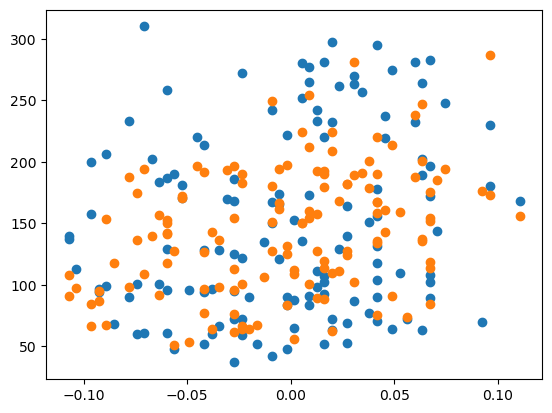

In [14]:
## 정답 데이터와 예측한 데이터 시작화하기 

import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()